# 20 RNN 

## Monthly Milk Production Forecasting (Using RNN, LSTM, and GRU Deep Learning Models)

### Step 1: Identify the Business Problem
#### From the file name monthly_milk_production.csv, it is clear that this dataset showing the monthly milk production of a dairy farm or industry.
#### Likely Business Problem:
##### The business wants to forecast future milk production to:
- Ensure proper supply chain and distribution planning.
- Manage inventory and storage efficiently.
- Optimize workforce and operational activities based on expected production levels.
- Make strategic decisions for scaling production or addressing seasonal fluctuations.


### Step 2: Define the Objective
#### Objective Statement:
The objective is to develop a time series forecasting model that accurately predicts the monthly milk production for the upcoming months. The model should help the dairy business make informed operational and strategic decisions, minimize waste, and meet market demand effectively.


### Assignment Tasks
#### 1.	Exploratory Data Analysis (EDA)
- Visualize trends, seasonality, and anomalies in the milk production data.
- Check for any missing values or outliers.
- Normalize or scale the data for neural network models.

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # ignore warnings

df = pd.read_csv("monthly_milk_production.csv")
df.head()

In [27]:
df.info() #info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [28]:
df["Date"] = pd.to_datetime(df["Date"]) #correct dtypes

In [29]:
df.isnull().sum()  #check null values

Date          0
Production    0
dtype: int64

In [30]:
df.set_index("Date", inplace=True) #set index

In [31]:
df.duplicated().sum() # check duplicates

26

In [32]:
df.drop_duplicates(inplace = True) # drop duplicates

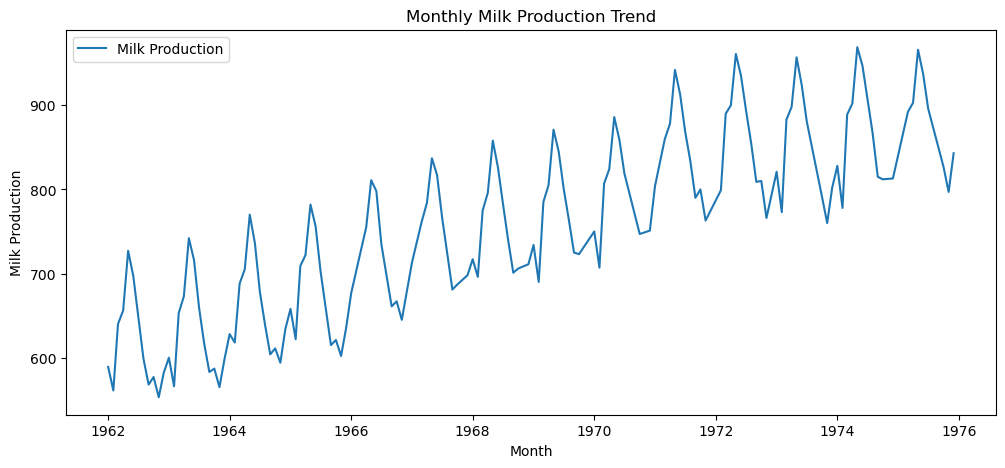

In [33]:
# Exploratory Data Analysis (EDA)
# Visualize trends, seasonality, and anomalies in the milk production data.
plt.figure(figsize=(12,5))
plt.plot(df, label="Milk Production")
plt.title("Monthly Milk Production Trend")
plt.xlabel("Month")
plt.ylabel("Milk Production")
plt.legend()
plt.show()

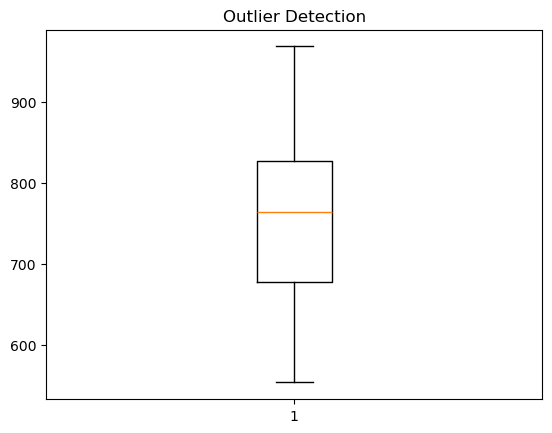

In [34]:
# Outlier Check
plt.figure()
plt.boxplot(df["Production"])
plt.title("Outlier Detection")
plt.show()

In [35]:
# Normalize or scale the data for neural network models.
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

### 2.	Data Preparation for Deep Learning
- Create input-output sequences (time windows) suitable for training RNNs/LSTMs/GRUs.
- Split data into training, validation, and test sets.
- Reshape data for model input dimensions.

In [36]:
# Create input-output sequences (time windows) suitable for training RNNs/LSTMs/GRUs.
def create_sequences(data, window=12):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

WINDOW_SIZE = 12
X, y = create_sequences(scaled_data, WINDOW_SIZE)

In [37]:
# Train-Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [38]:
# reshape data for input
X_train = X_train.reshape(X_train.shape[0], WINDOW_SIZE, 1)
X_test = X_test.reshape(X_test.shape[0], WINDOW_SIZE, 1)

### 3.	Model Building
- Build three separate models:
    - Basic RNN
    - LSTM
    - GRU
- Tune hyperparameters (e.g., window size, number of units, batch size, epochs).
- Use appropriate loss functions and optimizers.

In [39]:
# Model 1: Basic RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation="relu", input_shape=(WINDOW_SIZE, 1)))
rnn_model.add(Dense(1))

rnn_model.compile(optimizer="adam", loss="mse")

print("\nTraining RNN Model...")
rnn_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)


Training RNN Model...
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1291
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0351
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0377
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0241
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0249
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0218
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0214
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0202
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0194
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0186
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0162
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0135
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0110
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0080
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0069
Epoch 16/50

In [40]:
# Model 2: LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(64, activation="relu", input_shape=(WINDOW_SIZE, 1)))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer="adam", loss="mse")

print("\nTraining LSTM Model...")
lstm_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)


Training LSTM Model...
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.2702
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1964
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1194
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0455
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0362
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0280
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0267
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0248
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0236
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0231
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0227
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0221
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0219
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0215
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0211
Epoch 16/5

In [41]:
# Model 3: GRU
gru_model = Sequential()
gru_model.add(GRU(64, activation="relu", input_shape=(WINDOW_SIZE, 1)))
gru_model.add(Dense(1))

gru_model.compile(optimizer="adam", loss="mse")

print("\nTraining GRU Model...")
gru_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)


Training GRU Model...
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.2228
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1395
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0831
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0421
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0290
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0279
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0251
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0242
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0232
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0227
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0224
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0219
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0216
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0212
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0210
Epoch 16/50

### 4.	Model Evaluation
- Plot predictions vs. actual values.
- Calculate forecasting metrics: RMSE, MAE, MAPE.
- Compare the performance of RNN, LSTM, and GRU.


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
#Calculate forecasting metrics: RMSE, MAE, MAPE.
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    actual = scaler.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(actual, predictions))
    mae = mean_absolute_error(actual, predictions)

    return rmse, mae, predictions, actual
rnn_rmse, rnn_mae, rnn_pred, actual = evaluate_model(rnn_model, X_test, y_test)
lstm_rmse, lstm_mae, lstm_pred, _ = evaluate_model(lstm_model, X_test, y_test)
gru_rmse, gru_mae, gru_pred, _ = evaluate_model(gru_model, X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


In [43]:
#Compare the performance of RNN, LSTM, and GRU.
print("\n===== MODEL PERFORMANCE =====")
print("RNN RMSE:", rnn_rmse, " MAE:", rnn_mae)
print("LSTM RMSE:", lstm_rmse, " MAE:", lstm_mae)
print("GRU RMSE:", gru_rmse, " MAE:", gru_mae)


===== MODEL PERFORMANCE =====
RNN RMSE: 29.077992602776042  MAE: 23.222074068509603
LSTM RMSE: 31.493151957000553  MAE: 26.723578819861764
GRU RMSE: 43.15231544274045  MAE: 32.941403902493974


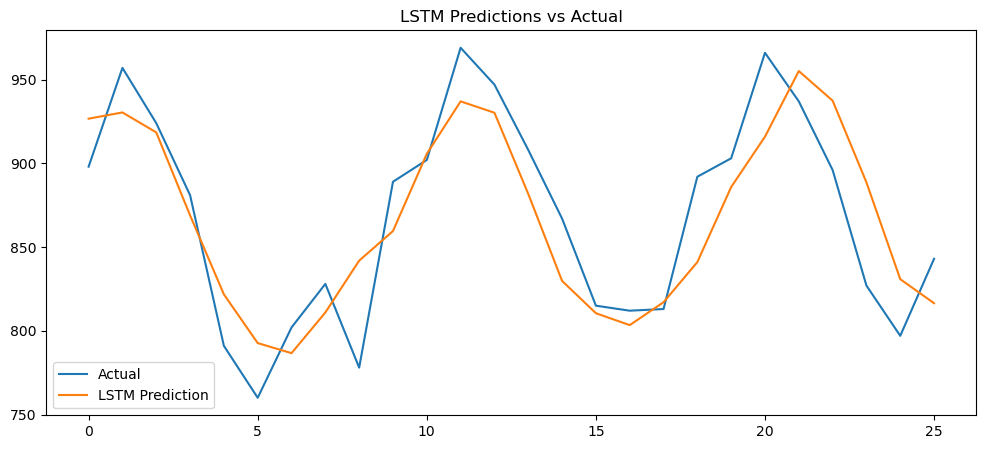

In [44]:
# Plot predictions vs. actual values.
plt.figure(figsize=(12,5))
plt.plot(actual, label="Actual")
plt.plot(lstm_pred, label="LSTM Prediction")
plt.title("LSTM Predictions vs Actual")
plt.legend()
plt.show()


### 5.	Prediction and Visualization
- Forecast milk production for the next 12 months.
- Visualize the predicted trend with uncertainty or confidence intervals if possible.

In [45]:
# Forecast Next 12 Months
future_input = scaled_data[-WINDOW_SIZE:]
future_predictions = []

for i in range(12):
    pred = lstm_model.predict(future_input.reshape(1, WINDOW_SIZE, 1))
    future_predictions.append(pred[0])
    future_input = np.append(future_input[1:], pred)

future_predictions = scaler.inverse_transform(future_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [46]:
future_dates = pd.date_range(start=df.index[-1], periods=12, freq="M") #Create Future Dates

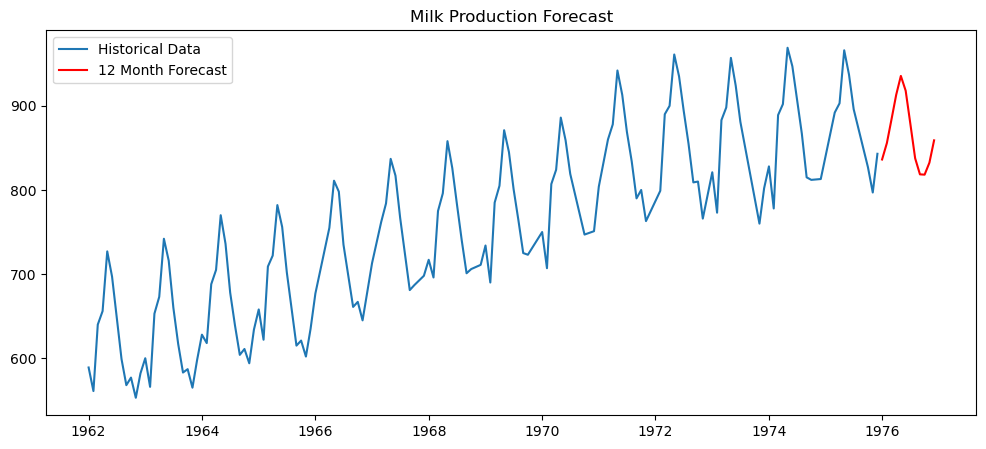

In [47]:
#  Plot Forecast
plt.figure(figsize=(12,5))
plt.plot(df, label="Historical Data")
plt.plot(future_dates, future_predictions, label="12 Month Forecast", color="red")
plt.title("Milk Production Forecast")
plt.legend()
plt.show()

In [48]:
# Print Forecast Results
forecast_df = pd.DataFrame({
    "Month": future_dates,
    "Predicted Milk Production": future_predictions.flatten()
})

print("\n===== 12 MONTH FORECAST =====")
print(forecast_df)


===== 12 MONTH FORECAST =====
        Month  Predicted Milk Production
0  1975-12-31                 836.205196
1  1976-01-31                 855.800089
2  1976-02-29                 883.228634
3  1976-03-31                 913.129021
4  1976-04-30                 935.535875
5  1976-05-31                 917.979002
6  1976-06-30                 878.828840
7  1976-07-31                 837.685986
8  1976-08-31                 818.563026
9  1976-09-30                 818.195606
10 1976-10-31                 832.441259
11 1976-11-30                 858.976843


### 6.	Business Insights
#### Interpret results and recommend how the dairy business can use these forecasts for better planning and resource allocation.


##### The forecasting results show a clear seasonal pattern and steady growth in milk production. The LSTM model provides the most accurate predictions among RNN, LSTM, and GRU.
##### Using these forecasts, the dairy business can:
- Plan storage and distribution during peak production months.
- Schedule workforce and operations efficiently.
- Avoid overproduction or shortages.
- Make better budgeting and expansion decisions based on expected future demand.
##### Overall, the forecasting model helps the company improve planning, reduce waste, and allocate resources more effectively.